In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.DataFrame({'Mileage':[15,14,17,7,10,7,20,21,18,11,7.9,8.6,12.3,17.1,19.4],
                 'Premium':[175.5,110.2,95.7,260.2,185.4,200.9,56.9,77.5,150,120.3,250,220,217.5,140.88,97.25]})

In [3]:
x=data['Mileage']
y=data['Premium']

In [4]:
#y.values.reshape(-1,1)

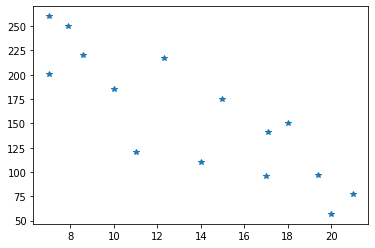

In [5]:
plt.plot(x,y,"*")

In [6]:
data.corr()

,Mileage,Premium
Mileage,1.000000,-0.850834
Premium,-0.850834,1.000000


In [7]:
# can i take b1 value as 1 ??? No because it is negatively correalted.
# Lets assume
b1=-1
b0=250

In [8]:
yreg= b1*x +b0

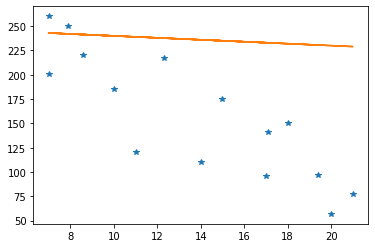

In [9]:
plt.plot(x,y,"*")
plt.plot(x,yreg)
# its a poor fit

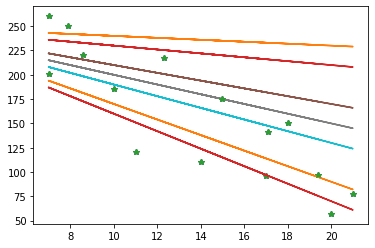

In [10]:
for b1 in [-1,-2,-4,-5,-6,-8,-9]:
    plt.plot(x,y,"*")
    plt.plot(x,b1*x+b0)
    
# Explore for differnt coefficients

In [11]:
# Use the formlua we have derived using OLS to compute b1 and b0

b1=np.sum((x-x.mean())*(y-y.mean())) / np.sum((x-x.mean())**2)

In [12]:
b1

-11.057345018753576

In [13]:
b0=y.mean()-b1*x.mean()
b0

308.5535288233406

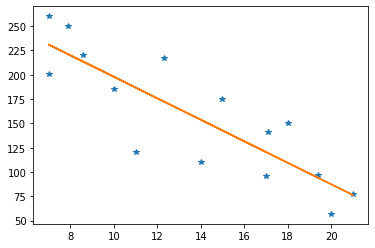

In [14]:
plt.plot(x,y,"*")
plt.plot(x,b1*x+b0)

In [15]:
# residue - difference between actual and predicted(fitted) value
yreg=b1*x+b0 # fitted value
residue=y-yreg
residue

#The first observation residue is 32.8, which tells that actual value is 32 units more than predicted value.
#the second observation reside is -43.55, then means the actual value is 43 units less than predicted

0     32.806646
1    -43.550699
2    -24.878664
3     29.047886
4    -12.580079
5    -30.252114
6    -30.506628
7      1.150717
8     40.478682
9    -66.622734
10    28.799497
11     6.539638
12    44.951815
13    21.407071
14     3.208965
dtype: float64

In [16]:
np.sum(residue)
#Sum of residue close to zero is the indicator of the balanced position line, 
#but it doesn't mean the total error of the model is less

-1.8474111129762605e-13

In [17]:
#sum of square error
sse = np.sum((y-yreg)**2)
sse

15879.610267170086

In [18]:
#mean square error
mse=np.mean((y-yreg)**2)
mse

1058.6406844780058

In [19]:
# Root mean square error
rmse=np.sqrt(mse)
rmse

32.53675897316765

In [20]:
# Variance measure
# SST - Sum of Square of Total 
    # sum of square Differnce between the mean model value(average of output) and actual value
# SSR - sum of Square of Regression 
    # sum of square Differnce between the mean model output and regression model output(yreg) 
# SSE - sum of square of error
    # sum of square Differnce between the actual output and regression model output (yreg)

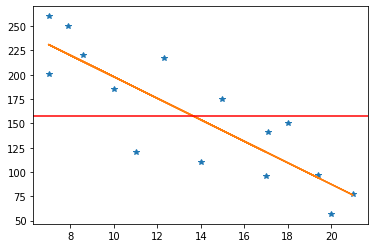

In [21]:
plt.plot(x,y,"*") # actual output
plt.plot(x,b1*x+b0) # reression model
plt.axhline(y.mean(),color='r') # mean model

In [22]:
sst = np.sum((y.mean() - y)**2)
ssr = np.sum((y.mean()-yreg)**2)
sse = np.sum((y-yreg)**2)

In [23]:
sst,ssr,sse

(57517.81137333333, 41638.201106163266, 15879.610267170086)

In [24]:
ssr+sse  # sst = ssr+sse

57517.81137333335

In [25]:
r_square = ssr/sst  #--- models explained variance out of total varaince

# generally vary from 0 to 1

In [26]:
r_square

0.7239183847921543

In [27]:
# The constructed linear regression model abilty to explain the variance in the output is by 72%

In [28]:
import statsmodels.api as sm

In [29]:
xc=sm.add_constant(x)

In [30]:
x.head(2)

0    15.0
1    14.0
Name: Mileage, dtype: float64

In [31]:
xc.head(2)

,const,Mileage
0,1.0,15.0
1,1.0,14.0


In [32]:
xc=sm.add_constant(x)
ols=sm.OLS(y,xc)
ols_mod=ols.fit()
ols_mod.summary()

C:\Users\senthil kumar\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     34.09
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           5.79e-05
Time:                        09:21:21   Log-Likelihood:                -73.520
No. Observations:                  15   AIC:                             151.0
Df Residuals:                      13   BIC:                             152.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.5535     27.447     11.242      0.000     249.258     367.849
Mileage      -11.0573      1.894     -5.838      0.000     -15.149      -6.966
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.908
Skew:                          -0.389   Prob(JB):                        0.635
Kurtosis:                       2.079   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# H0 : All the input feature coefficients are zero

#p value is less than 0.05, so we are rejecting the null hypothesis, 
#which means the model input features are significant, in other words my model is not a mean model

In [34]:
#b1 (mileage coeff) = -11.0573

# for every one unit of increase in mileage the premium amount will decrease by 11.0573 units,
# provided all other inputs are remain constant.

In [35]:
sse

15879.610267170086

In [36]:
k=1 # no of input feature
mse = sse/(len(x)-k-1)

In [37]:
rmse=np.sqrt(mse)

In [38]:
std_err=rmse / np.sqrt(np.sum((x-x.mean())**2))

In [39]:
std_err

1.8938829107553148

In [40]:
#ttset
# H0: The corresponding input variabe coefficient is zero

In [41]:
# tstat= (est_coef - true_coef) / std_err

tstat=(-11.0573 - 0)/std_err
tstat

-5.8384285201613375

In [42]:
from scipy import stats as stats
t_table_value=stats.t.ppf(0.05/2,len(x)-2)
t_table_value

-2.160368656461013

In [43]:
# Automobile expert saying that one unit increase in milage will reduce the premium by 20 units ? 
# Can we accept his openion? 
# use 20 in place of true value in tstat formula and analyse
# Also can use Confidence Interval to make decision about his statement.
#Confidence interval is 15 to 6, 20 is out of this rance, so we can reject his statement.

In [44]:
data=pd.read_csv('GDP_Country1.csv')
#data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/GDP_Country1.csv')

In [45]:
data.head(2)

,Country,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [46]:
data1=data.set_index('Country')
data1.head(2)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [47]:
data1.isnull().sum()/len(data1)

Population                            0.000000
Area_sqm                              0.000000
Pop_Density_per sqm                   0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         0.013216
Infant mortality (per 1000 births)    0.013216
GDP ($ per capita)                    0.004405
Literacy (%)                          0.079295
Phones (per 1000)                     0.017621
Arable (%)                            0.008811
Crops (%)                             0.008811
Other (%)                             0.008811
Climate                               0.096916
Birthrate                             0.013216
Deathrate                             0.017621
Agriculture                           0.066079
Industry                              0.070485
Service                               0.066079
dtype: float64

In [48]:
#!pip install missingpy
#from missingpy import KNNImputer
from sklearn.impute import KNNImputer
impu=KNNImputer()
data2=impu.fit_transform(data1)
data2=pd.DataFrame(data2,columns=data1.columns,index=data1.index)

In [49]:
data2.head(2)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [50]:
data2.isnull().sum()

Population                            0
Area_sqm                              0
Pop_Density_per sqm                   0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


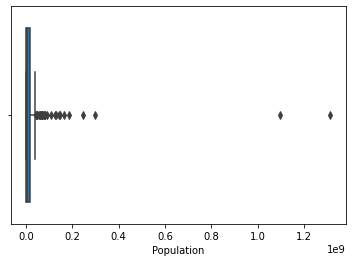

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


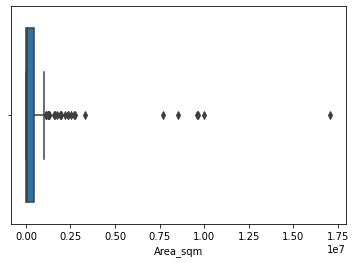

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


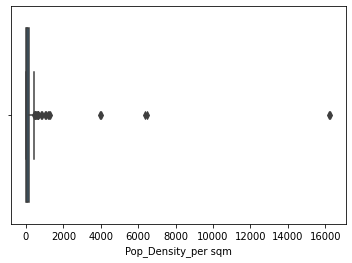

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


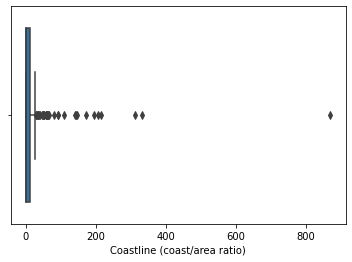

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


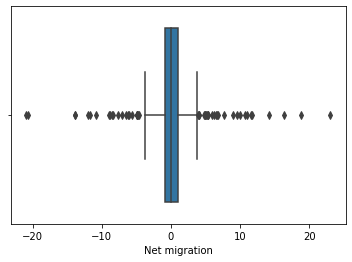

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


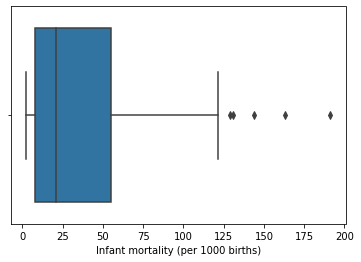

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


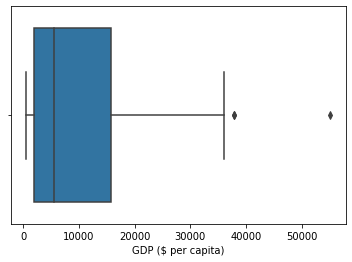

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


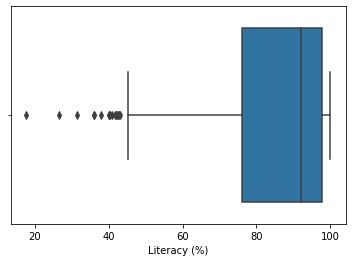

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


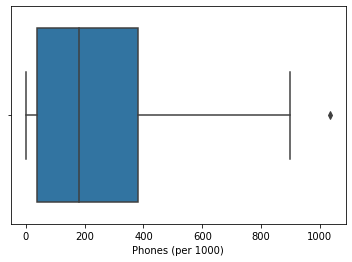

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


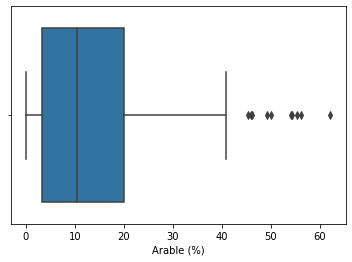

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


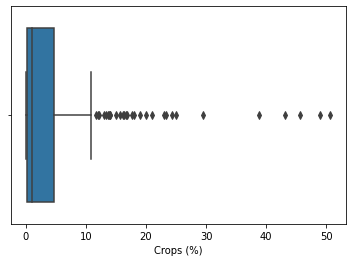

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


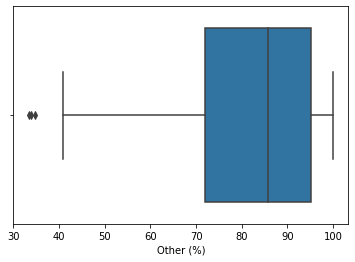

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


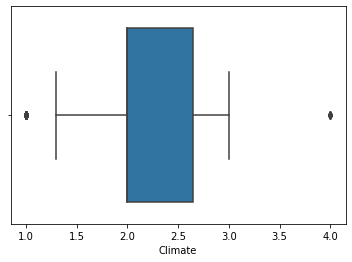

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


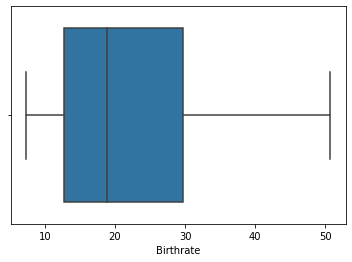

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


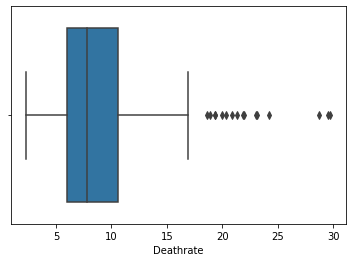

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


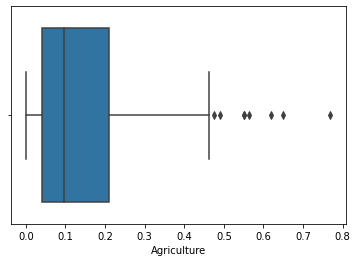

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


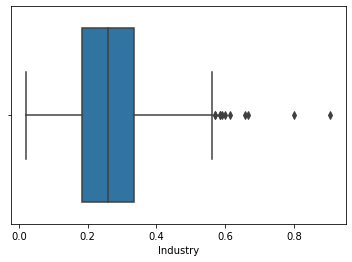

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


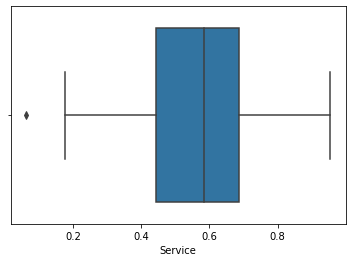

In [51]:
for i in data2.columns:
    sb.boxplot(data2[i])
    plt.show()

In [52]:
# Linear regression very sensitive to outliers

In [53]:
#Outlier Treatment
#Capping the outliers #Winsorization
for i in data2.columns:
    q1=data2[i].quantile(0.25)
    q3=data2[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=data2[i].quantile(0.99)
    lc=data2[i].quantile(0.01)
    for ind1 in data2[i].index:
        if data2.loc[ind1, i] >ub:            
            data2.loc[ind1, i] =uc
        if data2.loc[ind1, i] < lb:
            data2.loc[ind1, i] =lc

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


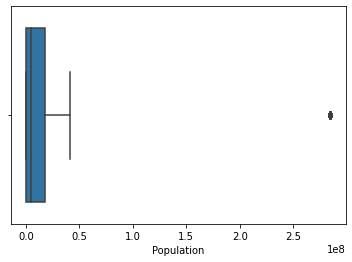

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


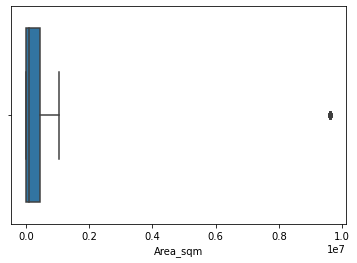

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


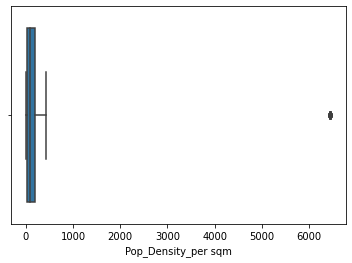

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


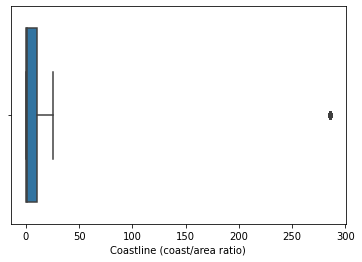

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


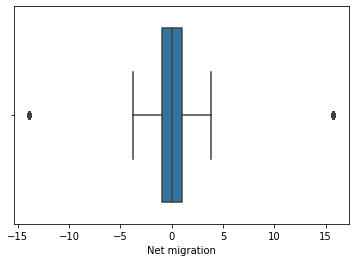

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


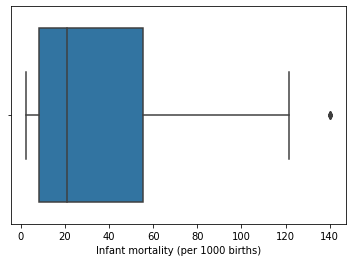

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


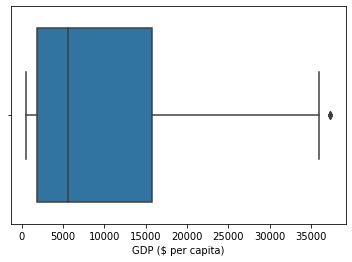

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


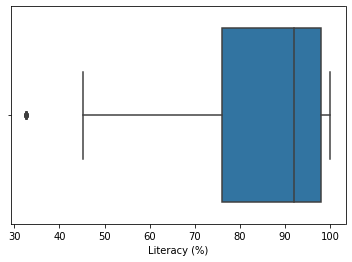

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


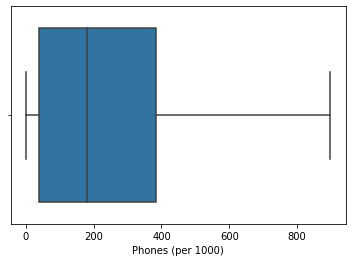

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


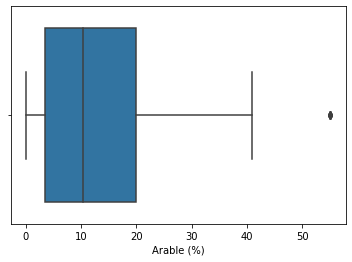

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


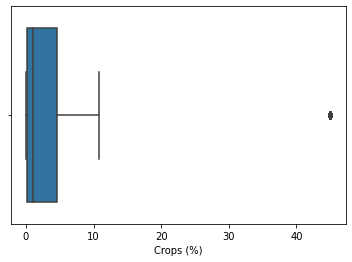

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


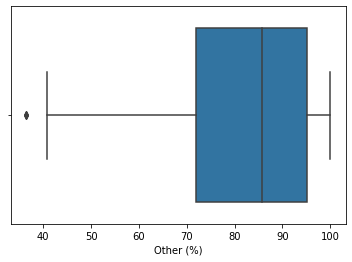

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


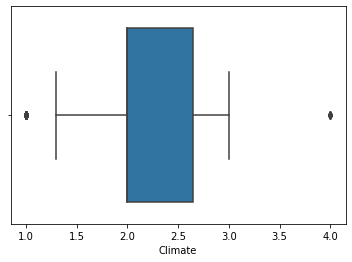

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


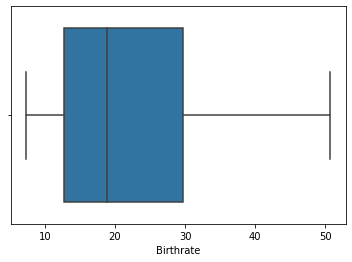

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


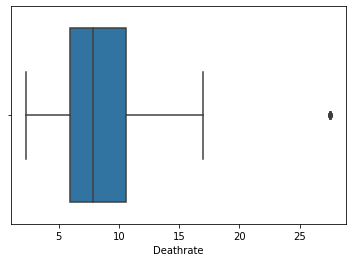

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


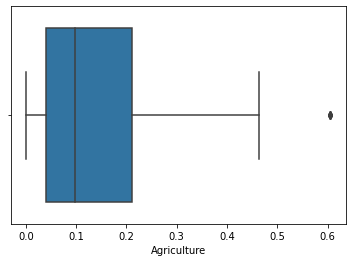

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


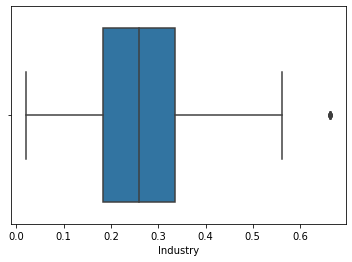

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


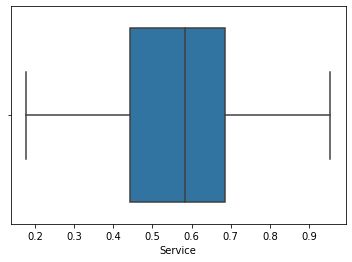

In [54]:
for i in data2.columns:
    sb.boxplot(data2[i])
    plt.show()

In [55]:
data.columns

Index(['Country', 'Population', 'Area_sqm', 'Pop_Density_per sqm',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [56]:
out=data2['GDP ($ per capita)']
inp=data2.drop('GDP ($ per capita)',axis=1)

In [57]:
inpc=sm.add_constant(inp)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.40e-63
Time:                        09:21:35   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               8642.6765   1.21e+04      0.715      0.475   -1.52e+04    3.25e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     6.21e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns,index=inp.index)

In [59]:
inp_sc.head(1)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,-0.115094,-0.220266,-0.347864,-0.47018,2.143829,3.079871,-2.537552,-1.041107,-0.132135,-0.502354,0.375437,-1.69457,2.210162,3.055247,1.612835,-0.263552,-1.201003


In [60]:
inp.head(1)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,31056997.0,647500.0,48.0,0.0,15.7414,140.299,32.57,3.2,12.13,0.22,87.65,1.0,46.6,27.5374,0.38,0.24,0.38


In [61]:
pval=ols_mod.pvalues
pval[ols_mod.pvalues < 0.05]

Coastline (coast/area ratio)    1.170419e-04
Net migration                   8.195876e-10
Phones (per 1000)               7.879399e-30
dtype: float64

In [62]:
inpc=sm.add_constant(inp_sc)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.40e-63
Time:                        09:21:36   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               9620.3348    299.480     32.123      0.000    9029.946    1.02e+04
Population                           155.5794    356.182      0.437      0.663    -546.590     857.749
Area_sqm                             -59.3790    357.475     -0.166      0.868    -764.099     645.341
Pop_Density_per sqm                   51.8321    346.271      0.150      0.881    -630.799     734.463
Coastline (coast/area ratio)       -1581.3918    402.751     -3.926      0.000   -2375.366    -787.417
Net migration                       2115.4650    328.636      6.437      0.000    1467.598    2763.331
Infant mortality (per 1000 births) -1287.6527    923.107     -1.395      0.165   -3107.447     532.142
Literacy (%)                          -9.7969    497.915     -0.020      0.984    -991.376     971.782
Phones (per 1000)                   7198.9293    538.933     13.358      0.000    6136.488    8261.371
Arable (%)                         -1011.6755    970.714     -1.042      0.299   -2925.321     901.970
Crops (%)                           -321.7995    586.161     -0.549      0.584   -1477.345     833.746
Other (%)                           -553.4537   1126.368     -0.491      0.624   -2773.953    1667.046
Climate                             -126.8755    379.696     -0.334      0.739    -875.400     621.649
Birthrate                           -342.2609    741.738     -0.461      0.645   -1804.507    1119.985
Deathrate                            737.4182    474.695      1.553      0.122    -198.385    1673.221
Agriculture                         -651.6274   1340.186     -0.486      0.627   -3293.643    1990.389
Industry                             287.9492   1218.184      0.236      0.813   -2113.554    2689.453
Service                             -189.3032   1513.260     -0.125      0.901   -3172.512    2793.906
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
#Standard Scaler = x-x.mean() / x.std()
inp1=inp-inp.mean()

In [65]:
inpc=sm.add_constant(inp1)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.40e-63
Time:                        09:21:36   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               9620.3348    299.480     32.123      0.000    9029.946    1.02e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     4.75e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif['feature']=inp1.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
16,25.532397,Service
14,20.026042,Agriculture
15,16.545912,Industry
10,14.145739,Other (%)
8,10.506242,Arable (%)
5,9.500994,Infant mortality (per 1000 births)
12,6.134302,Birthrate
9,3.830876,Crops (%)
7,3.238427,Phones (per 1000)
6,2.764233,Literacy (%)


In [67]:
data2.corr()['GDP ($ per capita)']

Population                            0.017884
Area_sqm                             -0.060373
Pop_Density_per sqm                   0.238214
Coastline (coast/area ratio)          0.177843
Net migration                         0.403517
Infant mortality (per 1000 births)   -0.619008
GDP ($ per capita)                    1.000000
Literacy (%)                          0.513722
Phones (per 1000)                     0.847224
Arable (%)                            0.014793
Crops (%)                            -0.230128
Other (%)                             0.105637
Climate                               0.318543
Birthrate                            -0.661537
Deathrate                            -0.219528
Agriculture                          -0.580424
Industry                             -0.036918
Service                               0.535850
Name: GDP ($ per capita), dtype: float64

In [68]:
inpv1=inp1.drop('Service',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['feature']=inpv1.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
10,14.141041,Other (%)
8,10.504615,Arable (%)
5,9.466748,Infant mortality (per 1000 births)
12,6.134036,Birthrate
9,3.830859,Crops (%)
14,3.252902,Agriculture
7,3.212241,Phones (per 1000)
6,2.740219,Literacy (%)
13,2.508962,Deathrate
3,1.780749,Coastline (coast/area ratio)


In [69]:
inpv2=inpv1.drop('Other (%)',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['feature']=inpv2.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
5,9.437339,Infant mortality (per 1000 births)
11,6.065702,Birthrate
13,3.252899,Agriculture
7,3.201979,Phones (per 1000)
6,2.718619,Literacy (%)
12,2.508164,Deathrate
3,1.744867,Coastline (coast/area ratio)
14,1.713809,Industry
10,1.588994,Climate
8,1.413931,Arable (%)


In [70]:
inpv3=inpv2.drop('Infant mortality (per 1000 births)',axis=1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['feature']=inpv3.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
10,4.484879,Birthrate
6,3.132257,Phones (per 1000)
12,2.771160,Agriculture
5,2.582218,Literacy (%)
3,1.738336,Coastline (coast/area ratio)
13,1.665256,Industry
9,1.580450,Climate
11,1.463293,Deathrate
7,1.413394,Arable (%)
1,1.397710,Area_sqm


In [71]:
inpc=sm.add_constant(inpv3)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     60.12
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           9.60e-66
Time:                        09:21:37   Log-Likelihood:                -2224.0
No. Observations:                 227   AIC:                             4478.
Df Residuals:                     212   BIC:                             4529.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9620.3348    298.964     32.179      0.000    9031.013    1.02e+04
Population                    1.405e-06   3.84e-06      0.366      0.714   -6.16e-06    8.97e-06
Area_sqm                     -2.966e-05      0.000     -0.262      0.794      -0.000       0.000
Pop_Density_per sqm              0.0106      0.187      0.057      0.955      -0.357       0.379
Coastline (coast/area ratio)   -15.2505      3.771     -4.045      0.000     -22.683      -7.818
Net migration                  294.0734     45.252      6.499      0.000     204.871     383.276
Literacy (%)                     8.7987     24.219      0.363      0.717     -38.943      56.540
Phones (per 1000)               32.6500      2.370     13.778      0.000      27.979      37.321
Arable (%)                     -41.8676     26.638     -1.572      0.118     -94.378      10.643
Crops (%)                       -1.3818     23.463     -0.059      0.953     -47.632      44.869
Climate                       -128.6667    555.418     -0.232      0.817   -1223.515     966.182
Birthrate                      -75.7142     57.134     -1.325      0.187    -188.337      36.909
Deathrate                       50.4181     61.482      0.820      0.413     -70.776     171.612
Agriculture                  -5516.0947   3461.857     -1.593      0.113   -1.23e+04    1307.978
Industry                      2457.0810   2833.698      0.867      0.387   -3128.753    8042.915
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.039
Skew:                           0.225   Prob(JB):                     0.000542
Kurtosis:                       4.178   Cond. No.                     1.20e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# Normality 
#Check normality for residue
#residue = yactual - ypred
inpv3_c=sm.add_constant(inpv3)
ypred=ols_mod.predict(inpv3_c)
residue=out-ypred
residue


Country
Afghanistan       -4070.248562
Albania            4483.127877
Algeria            -564.873566
American Samoa     5523.648334
Andorra           -6189.432704
                      ...     
West Bank         -6357.222720
Western Sahara     -102.002783
Yemen             -2214.732453
Zambia            -1408.481678
Zimbabwe          -2058.438021
Length: 227, dtype: float64

In [73]:
ols_mod.resid

Country
Afghanistan       -4070.248562
Albania            4483.127877
Algeria            -564.873566
American Samoa     5523.648334
Andorra           -6189.432704
                      ...     
West Bank         -6357.222720
Western Sahara     -102.002783
Yemen             -2214.732453
Zambia            -1408.481678
Zimbabwe          -2058.438021
Length: 227, dtype: float64

In [74]:
residue.skew()

0.22683588080400058

In [75]:
ols_mod.resid.skew()

0.22683588080400058

<AxesSubplot:ylabel='Density'>

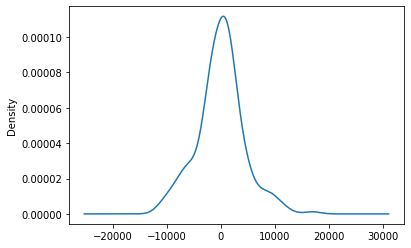

In [76]:
ols_mod.resid.plot(kind='kde')

In [77]:
import scipy.stats as stats

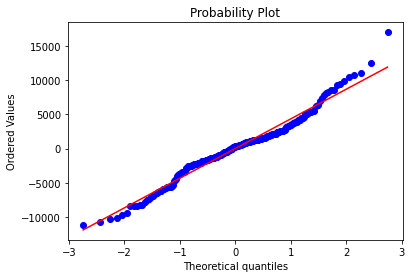

In [78]:
stats.probplot(ols_mod.resid,plot=plt)
plt.show()

In [79]:
# skew is between -0.5 to +0.5, we are ok with it and u can say ur residue is normal

In [80]:
# what if residue skew is more than 0.5, What is residue is not normal

# then go back and transform the output(actual) of data, 
     #then build the model again and check the skew of residue

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP ($ per capita)'>

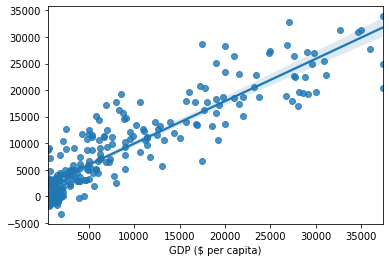

In [82]:
# Linearity Assumption
inpv3c=sm.add_constant(inpv3)
ypred=ols_mod.predict(inpv3c)
sb.regplot(out,ypred)

In [ ]:
# Scatter plot between the each input and the residue should be completely random 
# and symmetric about zero residue axis

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


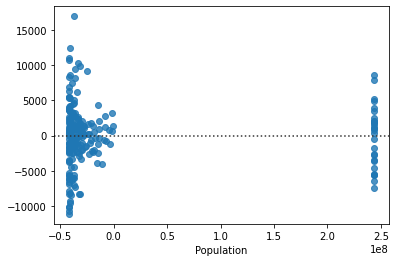

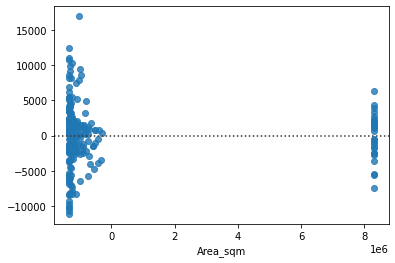

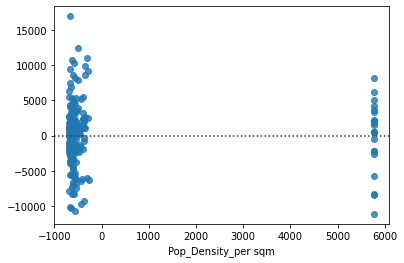

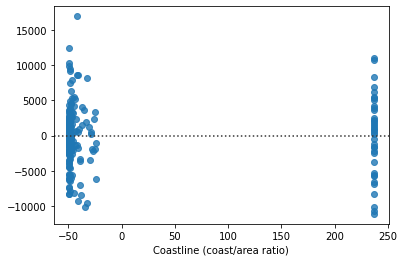

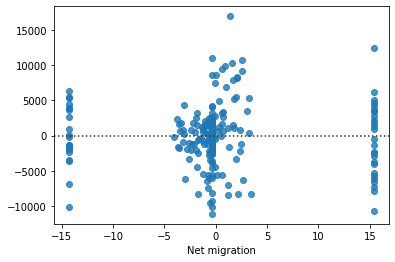

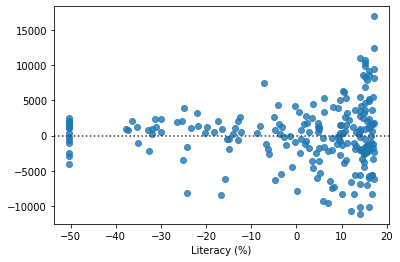

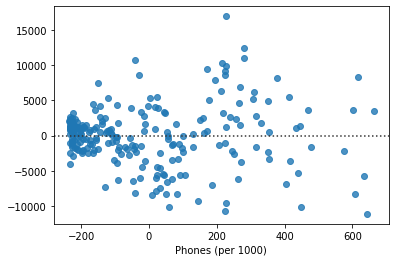

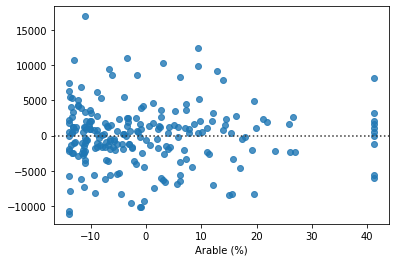

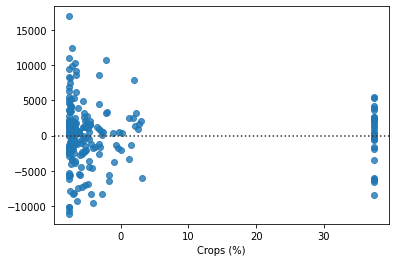

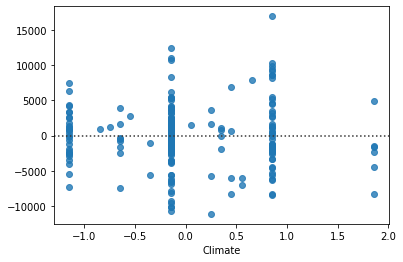

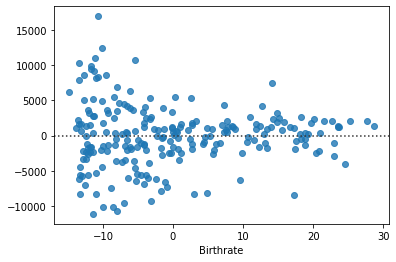

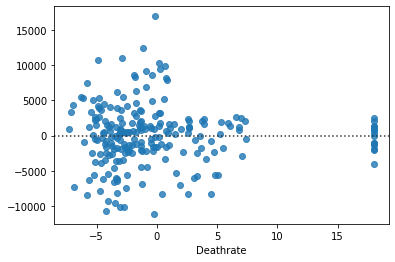

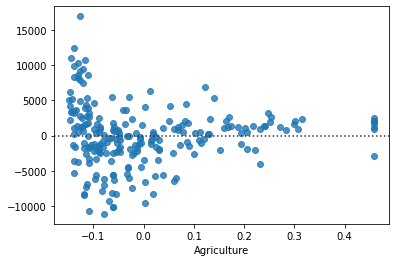

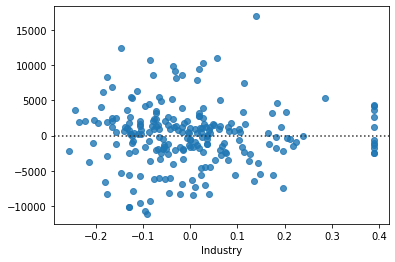

In [83]:
for i in inpv3.columns:
    sb.residplot(inpv3[i],ols_mod.resid)
    plt.show()

In [86]:
from statsmodels.stats.diagnostic import linear_rainbow
#H0 : Part of the data is Linear

sta,p=linear_rainbow(res=ols_mod,frac=0.5)
p

0.8338424695118343

In [87]:
# Autocorrealtion - Serial correltion
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     60.12
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           9.60e-66
Time:                        10:22:02   Log-Likelihood:                -2224.0
No. Observations:                 227   AIC:                             4478.
Df Residuals:                     212   BIC:                             4529.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9620.3348    298.964     32.179      0.000    9031.013    1.02e+04
Population                    1.405e-06   3.84e-06      0.366      0.714   -6.16e-06    8.97e-06
Area_sqm                     -2.966e-05      0.000     -0.262      0.794      -0.000       0.000
Pop_Density_per sqm              0.0106      0.187      0.057      0.955      -0.357       0.379
Coastline (coast/area ratio)   -15.2505      3.771     -4.045      0.000     -22.683      -7.818
Net migration                  294.0734     45.252      6.499      0.000     204.871     383.276
Literacy (%)                     8.7987     24.219      0.363      0.717     -38.943      56.540
Phones (per 1000)               32.6500      2.370     13.778      0.000      27.979      37.321
Arable (%)                     -41.8676     26.638     -1.572      0.118     -94.378      10.643
Crops (%)                       -1.3818     23.463     -0.059      0.953     -47.632      44.869
Climate                       -128.6667    555.418     -0.232      0.817   -1223.515     966.182
Birthrate                      -75.7142     57.134     -1.325      0.187    -188.337      36.909
Deathrate                       50.4181     61.482      0.820      0.413     -70.776     171.612
Agriculture                  -5516.0947   3461.857     -1.593      0.113   -1.23e+04    1307.978
Industry                      2457.0810   2833.698      0.867      0.387   -3128.753    8042.915
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.039
Skew:                           0.225   Prob(JB):                     0.000542
Kurtosis:                       4.178   Cond. No.                     1.20e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\senthil kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

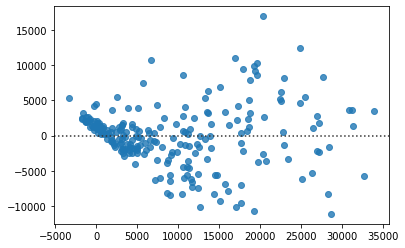

In [89]:
# Homoscadasity ---- My model should be homoscadastic (Not Hetroscadastic)
# Uniform variance in residue

sb.residplot(ypred,ols_mod.resid)

In [95]:
from statsmodels.stats.api import het_goldfeldquandt
stat,p,nat=het_goldfeldquandt(ols_mod.resid,inpv3)
p
#H0 : Model is Homoscadastic 

0.9537219755464738

In [96]:
het_goldfeldquandt(ols_mod.resid,inpv3)

(0.7124269225010617, 0.9537219755464738, 'increasing')

In [100]:
# To understand the overffiting nature of model (Inclass question)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inpv3,out,test_size=0.3)

xtrainc=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,xtrainc)
ols_mod=ols.fit()

ypred_train=ols_mod.predict(xtrainc)

xtestc=sm.add_constant(xtest)
ypred_test= ols_mod.predict(xtestc)

rmse_train= np.sqrt(np.mean((ytrain - ypred_train)**2))
rmse_test= np.sqrt(np.mean((ytest - ypred_test)**2))

# deviation between rmse_train and rmse_test is more then my model is overfitted

In [101]:
rmse_train,rmse_test

(4124.122567373849, 4953.864269223215)

there is an resonable difference between train error and test error. Test error is around 800 units more than train error. This model is having the problem of overfitting.